# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [97]:
#Import all the necessary modules
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df
Answer-1:

In [98]:
#colnames = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']
wine_df= pd.read_csv("winequality-red.csv")
wine_df['result'] = np.where(wine_df['quality']>=7, 1, 0)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [99]:
print('First 10 samples from dataset')
wine_df.head()

First 10 samples from dataset


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,result
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [100]:
print('Printing datatype of each column')
print(wine_df.info())

Printing datatype of each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
result                  1599 non-null int32
dtypes: float64(11), int32(1), int64(1)
memory usage: 156.2 KB
None


In [101]:
print('Printing shape of each column')
print(wine_df.shape)

Printing shape of each column
(1599, 13)


# Q4 Print the descriptive statistics of each & every column using describe() function

In [102]:
print('Printing descriptive statistice of each column using describe & transpose to see it column wise ')
wine_df.describe().transpose()

Printing descriptive statistice of each column using describe & transpose to see it column wise 


,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

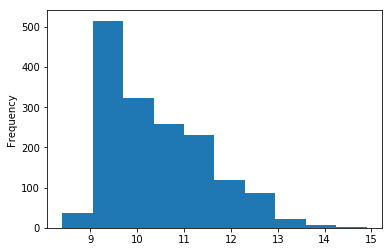

In [155]:
wine_df['alcohol'].plot.hist()

In [ ]:
#Inference
Histogram in left skewed,therefore mean is less than median.Data isn't fairly balanced.

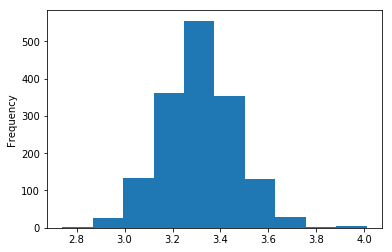

In [160]:
wine_df['pH'].plot.hist()

In [ ]:
#Inference
Histogram in not right/left skewed, therefore data is fairly balanced.

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [ ]:
Alcohol and qualitydensity and fixed acidity are correlated
citric acid and fixed acidity are correlated
total sulfur dioxide and free sulfur dioxide are highly correlated

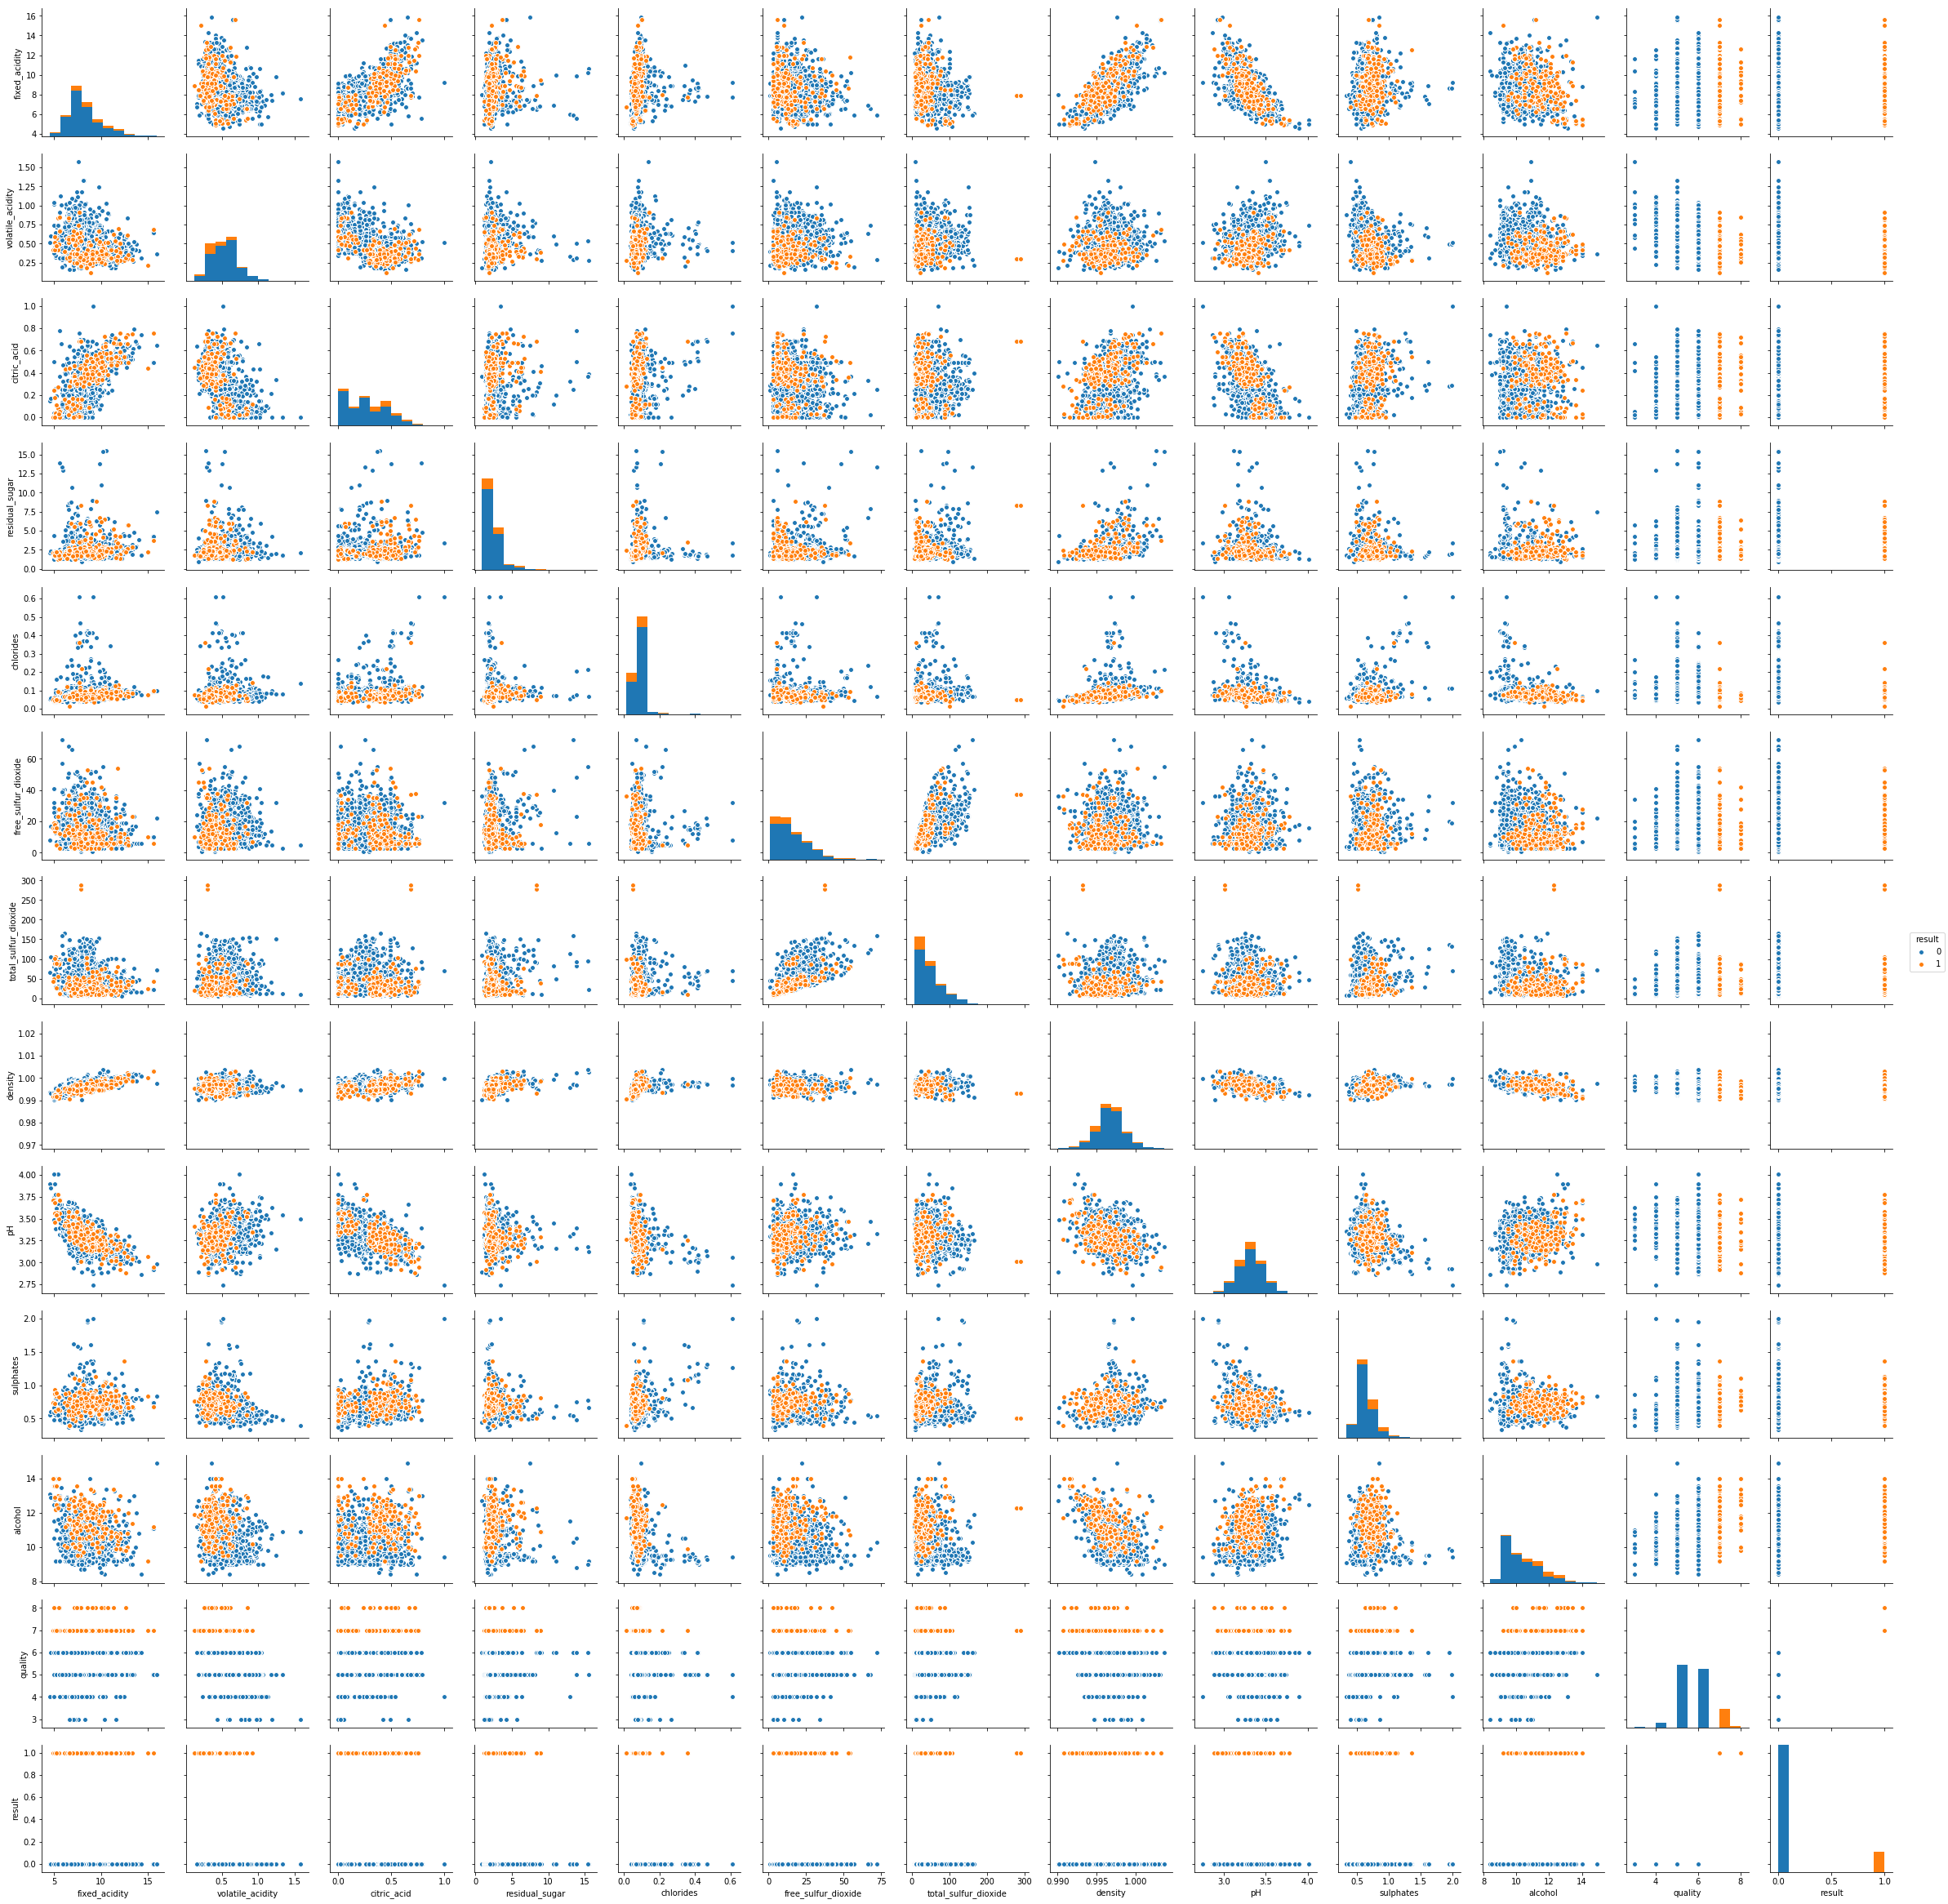

In [161]:
sns.pairplot(wine_df, hue = "result")

# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [104]:
array = wine_df.values
X = array[:,0:11] 
Y = array[:,12] 
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.30)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [105]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q9 Print the accuracy of the model & print the confusion matrix 

In [106]:
#Accuracy of the model
print('Accuracy of the model')
print(dt_model.score(X_test , y_test))
print(dt_model.score(X_train , y_train))

Accuracy of the model
0.8708333333333333
1.0


In [107]:
#confusion matrix
print('Confusion matix')
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

Confusion matix
[[376  33]
 [ 29  42]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [137]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3) 


#max_depth:3;test:0.881;train:0.889
#max_depth:4;test:0.875;train:0.915
#max_depth:5;test:0.877;train:0.931
#max_depth:6;test:0.88;train:0.947
dt_model.fit(X_train, y_train)

print('Accuracy of the test model',dt_model.score(X_test , y_test))

print('Accuracy of the training model',dt_model.score(X_train , y_train))

Accuracy of the test model 0.88125
Accuracy of the training model 0.8891867739052726


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)

In [139]:
y_predict = rfcl.predict(X_test)

#max_depth:3;accuracy:0.9
#max_depth:4;accuracy:0.9
#max_depth:5;accuracy:0.9

print('Accuracy')
print(rfcl.score(X_test , y_test))

print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy
0.90625
Confusion matrix
[[401   8]
 [ 37  34]]


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [140]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [141]:
y_predict = abcl.predict(X_test)

#max_depth:3;accuracy:0.87
#max_depth:4;accuracy:0.87
#max_depth:5;accuracy:0.872

print('Accuracy')
print(abcl.score(X_test , y_test))

print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy
0.8729166666666667
Confusion matrix
[[387  22]
 [ 39  32]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [142]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

In [143]:
y_predict = bgcl.predict(X_test)

#max_depth:3;accuracy:0.879
#max_depth:4;accuracy:0.883
#max_depth:5;accuracy:0.885

print('Accuracy')
print(bgcl.score(X_test , y_test))

print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy
0.8729166666666667
Confusion matrix
[[402   7]
 [ 54  17]]


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [145]:
y_predict = gbcl.predict(X_test)

#max_depth:3;accuracy:0.877
#max_depth:4;accuracy:0.875
#max_depth:5;accuracy:0.875

print('Accuracy')
print(gbcl.score(X_test , y_test))

print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy
0.8770833333333333
Confusion matrix
[[396  13]
 [ 46  25]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.